<a href="https://colab.research.google.com/github/sturu1/git-first/blob/master/Copy_of_sung_lec02_multilinear_regression(4)_%EC%A3%BC%EC%8B%9D%EA%B0%80%EA%B2%A9%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 주식 가격 예측

> 이번에는 보다 많은 데이터를 기반으로 multiple linear regression을 수행해 보겠습니다. 본 예제에서는 아래 주소에 있는 csv파일을 불러들여서 multiple linear regression을 수행해 보겠습니다. 

> 자료출처: https://github.com/hunkim/DeepLearningZeroToAll/tree/master/keras 

> 오늘 사용할 모델은 다음과 같이 수식으로 표현할 수 있습니다. 
```
y=w1*x1 + w2*x2 + w3*x3 + w3*x3 + b
```

> 오늘 예제를 통해 여러분은 간단한(정확도가 높지않은) 주가 예측 인공지능을 만들어 볼 수 있습니다. 
또한, **데이터 정규화**에 대한 내용도 여러분이 꼭 학습하셔야 합니다. 

> 먼저 데이터를 불러서 여러분의 작업환경에 저장하겠습니다. 

In [1]:
!wget https://raw.githubusercontent.com/hunkim/DeepLearningZeroToAll/master/keras/data-02-stock_daily.csv

--2020-06-11 08:16:55--  https://raw.githubusercontent.com/hunkim/DeepLearningZeroToAll/master/keras/data-02-stock_daily.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37037 (36K) [text/plain]
Saving to: ‘data-02-stock_daily.csv’

data-02-stock_daily 100%[===================>]  36.17K  --.-KB/s    in 0.01s   

2020-06-11 08:16:55 (2.42 MB/s) - ‘data-02-stock_daily.csv’ saved [37037/37037]



> 여러분의 디렉토리에 저장된 data-02-stock_daily.csv 파일을 읽어서 xy라는 변수에 저장합니다. 

In [2]:
!ls

data-02-stock_daily.csv  sample_data


In [0]:
import numpy as np
xy = np.loadtxt("data-02-stock_daily.csv", delimiter=',', dtype=np.float32)

In [4]:
xy.shape

(732, 5)

> 자료를 보면 각 일자별로 주식 가격에 대한 다음과 같은 5가지 정보가 기록되어 있습니다. 
* 장 시작가(시가), 최고가(고가), 최저가(저가), 거래량, 종가
* (Open,High,Low,Volume,Close)

> 총 732일에 대한 자료입니다. 

필요한 모듈을 불러옵니다. 
이번에는 sklearn 모듈을 추가로 활용하는데, **데이터 정규화**를 위해서 필요합니다. 

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

> 다음으로 학습을 위한 데이터를 입력 및 출력 변수로 나누어 저장합니다. 아래서 보는바와 같이 입력데이터는 732개의 개체(sample)가 있으며, 각 개체별로 5개의 변수(속성)를 갖고 있습니다. 즉, 732일의 일자동안, 각 일자별로 4개의 속성으로 입력데이터를 구성합니다. 또한 출력데이터는 732개의 개체와 각 개체별 1개의 속성(종가)으로 구성되어 있습니다.

> 이 문제는 **전날의 4가지 입력정보**, 즉 시가, 고가, 저가, 거래량을 바탕으로 **다음날의 종가를 예측**하는 문제입니다. 이를 위해서 몇가지 작업이 필요합니다. 

In [0]:
x_data = xy[:, :-1]
y_data = xy[:, [-1]]

In [18]:
x_data.shape, y-data.shape

NameError: ignored

> 딥러닝을 학습할때 중요한 한가지가 있습니다. 바로 **데이터의 정규화** (data normalization) 입니다. 

> 정규화에 대한 구체적인 얘기는 뒤에 다시하도록 하고, 여기서는 간단히 입력데이터 값을 [0,1] 사이의 값으로 변환하는 것을 의미한다는 정도만 설명하겠습니다. 

> 이렇게 데이터를 사전에 특정 범위 내로 변환하는 이유는, 정규화가 딥러닝의 성능을 높일 수 있기 때문입니다. 

> 앞선 예제들에서는 정규화 과정이 별도로 없었지만, 사실 모든 딥러닝 문제에서는 정규화 과정을 거의 항상 거친다고 봐도 무방합니다. 

> 본 절에서는 정규화를 수행하기 위해 머신러닝 모듈인 scikit_learn에서 재공하는 MinMaxScaler 함수(클래스)를 사용하겠습니다. 

> MinMaxScaler 함수는 주어진 데이터를 정해진 범위(feature_range)내의 값으로 변환해 주는 역할을 합니다. 

> 먼저, MinMaxScaler 클래스를 이용하여 0~1로 정규화를 해주는 scaler라는 instance를 생성합니다. 

In [0]:
scaler=MinMaxScaler(feature_range=(0,1))

> 생성된 scaler instance를 사용하여 입력데이터의 값의 범위를 0과 1사이로 변환합니다. 

In [0]:
x_data = scaler.fit_transform(x_data)

In [21]:
x_data

array([[9.7333574e-01, 9.7543156e-01, 1.0000000e+00, 1.1112306e-01],
       [9.5690036e-01, 9.5988119e-01, 9.8035455e-01, 1.4250247e-01],
       [9.4789577e-01, 9.4927347e-01, 9.7250485e-01, 1.1417048e-01],
       ...,
       [2.1051645e-01, 2.0528936e-01, 2.0355880e-01, 2.5992648e-04],
       [1.9393516e-01, 2.0364201e-01, 2.0866466e-01, 2.9846733e-03],
       [2.1375108e-01, 2.0817983e-01, 1.9179189e-01, 4.6607509e-04]],
      dtype=float32)

> 입력데이터의 값이 0과 1사이로 변환된 것을 확인할 수 있습니다. 

> 각 속성별로 최대값과 최소값을 확인해 볼까요? 

In [22]:
np.max(x_data, axis=0)

array([1.       , 1.0000001, 1.       , 1.       ], dtype=float32)

In [23]:
np.min(x_data, axis=0)

array([0., 0., 0., 0.], dtype=float32)

> 입력, 출력 변수의 모양을 확인해 봅니다. 

In [24]:
x_data.shape, y_data.shape

((732, 4), (732, 1))

> 앞서 언급한것 처럼, 이 문제는 **전날의 4가지 입력데이터**에 기반하여 **다음날의 출력데이터(종가)**를 예측하는 것입니다. 이를 위해서 본격적인 모델생성 및 학습 이전에 데이터를 조정할 필요가 있습니다. 

> 먼저 732일의 개체(일자) 중 첫날과 둘째날의 입력, 출력데이터를 확인해 봅시다.  



In [25]:
x_data[0], y_data[0]

(array([0.97333574, 0.97543156, 1.        , 0.11112306], dtype=float32),
 array([831.66], dtype=float32))

In [26]:
x_data[1], y_data[1]

(array([0.95690036, 0.9598812 , 0.98035455, 0.14250247], dtype=float32),
 array([828.07], dtype=float32))

> 사실 우리는 첫째날의 입력데이터(`x_data[0]`)을 기반으로 둘째날의 출력데이터(`y_data[1]`)을 예측하는 것이 목적입니다. 
> 이렇듯 우리의 자료의 수정이 필요합니다. 이를 위해 입력데이터의 마지막 개체(첫날)와 출력데이터의 첫번째 개체(첫날) 데이터를 삭제합니다.

>왜 이런 작업을 했을까요? 우리의 목적을 다시 생각해 봅시다. 

>우리는 전날의 입력데이터로 다음날의 출력데이터를 예측해야 합니다. 

>즉, 입력 데이터의 첫번째는 **전날**의 4개 속성(시가, 고가, 저가, 거래량)이 되고, 출력데이터의 첫번째는 **다음날**의 1개 속성(종가)가 되어야 하기 때문입니다. 

In [0]:
x_data = np.delete(x_data, -1, 0)
y_data = np.delete(y_data, 0, 0)

In [28]:
x_data.shape, y_data.shape

((731, 4), (731, 1))

> 다음은, keras에 내표된 Sequential() 클래스를 사용하여 모델 instance인 model을  만듭니다.

> 이어서 1개층, 1개의 unit으로 구성된 신경망을 구성합니다. 한개의 입력 데이터는 4개의 속성을 가지고 있으므로, `input_shape=(4,)`로 정의합니다. 

In [0]:
model = Sequential()
model.add(Dense(units=1, input_shape=(4,)))
model.compile(optimizer=SGD(lr=0.01), loss='mse')

> optimizer(gradient descent 알고리즘)와 learning rate, 손실함수를 정의하고 모델을 compile 합니다. 

> 모델을 100번에 걸쳐서 학습합니다. (epochs = 100)

In [35]:
history = model.fit(x_data, y_data, epochs=100)

Epoch 1/100
731/731 [==============================] - 0s 242us/step - loss: 221818.5143
Epoch 2/100
731/731 [==============================] - 0s 30us/step - loss: 46253.6629
Epoch 3/100
731/731 [==============================] - 0s 31us/step - loss: 11742.1318
Epoch 4/100
731/731 [==============================] - 0s 26us/step - loss: 4675.7927
Epoch 5/100
731/731 [==============================] - 0s 27us/step - loss: 2996.4584
Epoch 6/100
731/731 [==============================] - 0s 27us/step - loss: 2401.1549
Epoch 7/100
731/731 [==============================] - 0s 25us/step - loss: 2056.5108
Epoch 8/100
731/731 [==============================] - 0s 26us/step - loss: 1793.7932
Epoch 9/100
731/731 [==============================] - 0s 26us/step - loss: 1568.9279
Epoch 10/100
731/731 [==============================] - 0s 26us/step - loss: 1376.3013
Epoch 11/100
731/731 [==============================] - 0s 26us/step - loss: 1209.4356
Epoch 12/100
731/731 [=========================

> 100번의 학습(epoch) 동안 손실함수 값의 변화를 그려보겠습니다. 

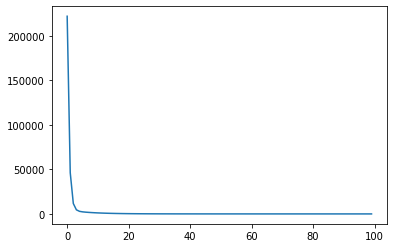

In [37]:
plt.plot(history.history["loss"])
plt.show()

> 이 모델이 주가 예측을 얼마나 잘 하고 있는지 확인해 볼까요? 

> 우선, 11번째 입력 데이터를 가지고, 모델의 예측값과, 실제 값을 비교해 보겠습니다. 

> 우선 11번째 입력데이터를 확인해 보겠습니다. 

In [0]:
test = x_data[10].reshape(-1, 4)

In [46]:
model.predict(test)

array([[795.3003]], dtype=float32)

In [48]:
y_data[10]

array([801.49], dtype=float32)

> 11일차의 주가 관련 4개의 입력데이터를 확인 할 수 있습니다. 
그런데, 이 데이터를 모델에 바로 입력할 수 없습니다. 
그 이유는 여러분이 만든 모델은 rank가 2인 데이터만 입력 받기 때문입니다. 즉, 여러분의 입력데이터(x_data)와 동일한 shape 이어야 합니다(sample 갯수는 제외)
따라서 여러분의 데이터를 rank가 2인 데이터로 수정해 줘야 합니다. 
이때 numpy의 `reshape()` 라는 함수를 사용합니다. 
`reshape(a,b)`라고 하면, 자료의 shape을 a,b로 변환해줍니다. `reshape(-1,4)`에서 
앞의 -1은 알아서 정하라는 의미입니다. 여러분의 데이터는 4개의 요소로 구성되어 있으므로, 4개의 데이터를 감싸는 하나의 축이 더 생성됩니다. 

> 그럼 이제 test 변수에 저장된 입력 변수를 가지고 모델을 통해서 다음날의 주가 예측을 수행해 볼까요? 

> 실제 다음날의 주가(종가)는 얼마였을까요? 이 값은 출력변수인 y_data에 11번째 개체에 저장되어 있겠죠? 

이 두 값을 한번에 표현해 보겠습니다. 

> 같은 작업을 31번째 데이터(31일차)에 대해서도 해볼까요? 

> 얼추 비슷하게 맞는것 같습니까? 

> 축하합니다. 여러분은 단순한 신경망을 구성하여 주가를 예측하는 프로그램을 만드셨습니다. 